In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import os
import glob
import zipfile
import re
import ktrain
from ktrain import vision as vis
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
#files = zipfile.ZipFile("utk data/archive(1).zip",'r')
#files.extractall()
#files.close()

In [3]:
pattern= r'([^/]+)_\d+_\d+_\d+.jpg.chip.jpg$'

p=re.compile(pattern)
r=p.search("10_0_0_20161220222308131.jpg.chip.jpg")
print(r.group(1))

10


In [4]:
DATADIR= "IMAGES"

(train_data, test_data, preproc)=vis.images_from_fname(DATADIR, pattern=pattern, is_regression=True, random_state=42)



['label']
    label
31   20.0
88   18.0
95   29.0
77   38.0
4    25.0
['label']
    label
30    2.0
65   23.0
64   16.0
53   24.0
45   13.0
Found 93 validated image filenames.
Found 11 validated image filenames.


/home/azivic/miniconda3/lib/python3.7/site-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for IMAGES/39_1_20170116174525125.jpg.chip.jpg -  skipping this file
  "Could not extract target for %s -  skipping this file" % (fname)
/home/azivic/miniconda3/lib/python3.7/site-packages/ktrain/utils.py:871: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  "is_regression=True was supplied but targets are strings - casting to floats"
/home/azivic/miniconda3/lib/python3.7/site-packages/ktrain/utils.py:723: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  + "If this is incorrect, change accordingly."
/home/azivic/miniconda3/lib/python3.7/site-packages/ktrain/utils.py:871: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  "is_regression=True was supplied but targets are str

In [5]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [5]:
model= vis.image_regression_model("pretrained_resnet50", train_data=train_data, val_data=test_data)


The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
pretrained_resnet50 model created.


In [6]:
learner= ktrain.get_learner(model=model, train_data=train_data, val_data=test_data, batch_size= 30)

learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
4/4 [==============================] - 57s 12s/step - loss: 442.0307 - mae: 18.0519 - val_loss: 170.8157 - val_mae: 11.7369
Epoch 2/2
4/4 [==============================] - 47s 11s/step - loss: 303.1858 - mae: 14.4623 - val_loss: 65.4422 - val_mae: 7.7221


In [7]:
learner.freeze(15)

learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
4/4 [==============================] - 165s 30s/step - loss: 187.1395 - mae: 10.6195 - val_loss: 44.7424 - val_mae: 5.9783
Epoch 2/2
4/4 [==============================] - 114s 26s/step - loss: 57.8120 - mae: 5.7717 - val_loss: 34.2228 - val_mae: 4.3888


In [11]:
predictor= ktrain.get_predictor(learner.model, preproc)


In [12]:
test_data.filenames

['2_0_2_20161219161726454.jpg.chip.jpg',
 '23_1_1_20170114033456731.jpg.chip.jpg',
 '16_0_0_20170102234641453.jpg.chip.jpg',
 '24_0_0_20170102233329675.jpg.chip.jpg',
 '13_1_0_20170110220422857.jpg.chip.jpg',
 '16_0_0_20170103201044224.jpg.chip.jpg',
 '16_0_0_20170104003740977.jpg.chip.jpg',
 '20_1_1_20170112191224819.jpg.chip.jpg',
 '15_1_4_20170103233356803.jpg.chip.jpg',
 '3_1_0_20161219154514612.jpg.chip.jpg',
 '18_0_0_20170110231703804.jpg.chip.jpg']

In [9]:
def show_pred(fname):
    
    fname=DATADIR + '/' + fname
    pred=round(predictor.predict_filename(fname)[0])
    real=int(p.search(fname).group(1))
    vis.show_image(fname)
    print("Predicted age: %s , Actual age: %s " % (pred,real))
    

Predicted age: 15 , Actual age: 2 


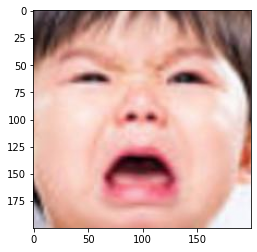

In [13]:
show_pred("2_0_2_20161219161726454.jpg.chip.jpg")

Predicted age: 22 , Actual age: 24 


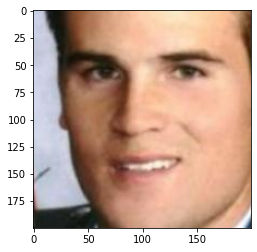

In [17]:
show_pred("24_0_0_20170102233329675.jpg.chip.jpg")

Predicted age: 16 , Actual age: 3 


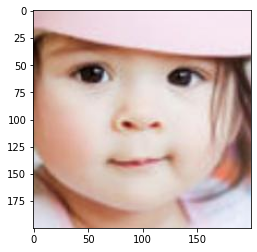

In [16]:
show_pred("3_1_0_20161219154514612.jpg.chip.jpg")

Predicted age: 15 , Actual age: 18 


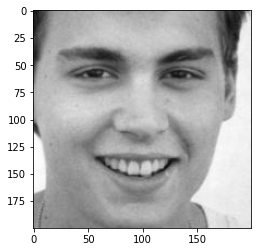

In [15]:
show_pred("18_0_0_20170110231703804.jpg.chip.jpg")

In [14]:
learner.evaluate(test_data=test_data)

[('mae', 4.3887987)]

In [18]:
filenames=[]
filenames= glob.glob("IMAGES/*")

In [19]:
len(filenames)

105

In [20]:
df=pd.DataFrame(filenames)
df['Actual_age']=0
df['Predicted_age']=0
df.rename({0:'Filename'}, inplace=True, axis=1)
df.head(4)

,Filename,Actual_age,Predicted_age
0,IMAGES/3_1_0_20161219154514612.jpg.chip.jpg,0,0
1,IMAGES/31_1_1_20170113011230351.jpg.chip.jpg,0,0
2,IMAGES/7_0_0_20170110220627122.jpg.chip.jpg,0,0
3,IMAGES/18_1_3_20170109214031495.jpg.chip.jpg,0,0


In [21]:
def calculate_predictions(fname):
    
    try:
        pred=round(predictor.predict_filename(fname)[0])
        real=int(p.search(fname).group(1))
    except:
        return (0,0)
    
    return (pred,real)

In [23]:
df['Actual_age']= [*map(show_pred1, df['Filename'])]
df

,Filename,Actual_age,Predicted_age
0,IMAGES/3_1_0_20161219154514612.jpg.chip.jpg,"(16, 3)",0
1,IMAGES/31_1_1_20170113011230351.jpg.chip.jpg,"(27, 31)",0
2,IMAGES/7_0_0_20170110220627122.jpg.chip.jpg,"(13, 7)",0
3,IMAGES/18_1_3_20170109214031495.jpg.chip.jpg,"(17, 18)",0
4,IMAGES/25_1_0_20170116201701430.jpg.chip.jpg,"(22, 25)",0
...,...,...,...
100,IMAGES/12_1_3_20170117174916351.jpg.chip.jpg,"(18, 12)",0
101,IMAGES/14_0_0_20170110232745742.jpg.chip.jpg,"(14, 14)",0
102,IMAGES/6_0_0_20170116201052637.jpg.chip.jpg,"(23, 6)",0
103,IMAGES/25_0_1_20170113151512351.jpg.chip.jpg,"(23, 25)",0


In [24]:
def splitListOfTuples(lst):
    lst1 = []
    lst2 = []
    for x, y in lst:
        lst1.append(x)
        lst2.append(y)
    return (lst1, lst2)


In [25]:
x, y = splitListOfTuples(df['Actual_age'])

In [27]:
df['Actual_age']=x
df['Predicted_age']=y
df

,Filename,Actual_age,Predicted_age
0,IMAGES/3_1_0_20161219154514612.jpg.chip.jpg,16,3
1,IMAGES/31_1_1_20170113011230351.jpg.chip.jpg,27,31
2,IMAGES/7_0_0_20170110220627122.jpg.chip.jpg,13,7
3,IMAGES/18_1_3_20170109214031495.jpg.chip.jpg,17,18
4,IMAGES/25_1_0_20170116201701430.jpg.chip.jpg,22,25
...,...,...,...
100,IMAGES/12_1_3_20170117174916351.jpg.chip.jpg,18,12
101,IMAGES/14_0_0_20170110232745742.jpg.chip.jpg,14,14
102,IMAGES/6_0_0_20170116201052637.jpg.chip.jpg,23,6
103,IMAGES/25_0_1_20170113151512351.jpg.chip.jpg,23,25


In [66]:
df.loc[df['Actual_age'] < 18, 'REAL'] = 'Maloletan' 
df.loc[df['Actual_age'] >= 18, 'REAL'] = 'Punoletan' 

df.loc[df['Predicted_age'] < 18, 'PRED'] = 'Maloletan' 
df.loc[df['Predicted_age'] >= 18, 'PRED'] = 'Punoletan' 

In [67]:
df

,Filename,Actual_age,Predicted_age,REAL,PRED
0,IMAGES/3_1_0_20161219154514612.jpg.chip.jpg,16,3,Maloletan,Maloletan
1,IMAGES/31_1_1_20170113011230351.jpg.chip.jpg,27,31,Punoletan,Punoletan
2,IMAGES/7_0_0_20170110220627122.jpg.chip.jpg,13,7,Maloletan,Maloletan
3,IMAGES/18_1_3_20170109214031495.jpg.chip.jpg,17,18,Maloletan,Punoletan
4,IMAGES/25_1_0_20170116201701430.jpg.chip.jpg,22,25,Punoletan,Punoletan
...,...,...,...,...,...
100,IMAGES/12_1_3_20170117174916351.jpg.chip.jpg,18,12,Punoletan,Maloletan
101,IMAGES/14_0_0_20170110232745742.jpg.chip.jpg,14,14,Maloletan,Maloletan
102,IMAGES/6_0_0_20170116201052637.jpg.chip.jpg,23,6,Punoletan,Maloletan
103,IMAGES/25_0_1_20170113151512351.jpg.chip.jpg,23,25,Punoletan,Punoletan


In [68]:
#df.to_csv('Predictions_final_sample.csv', index=False)

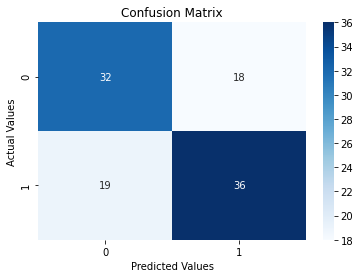

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cfm=confusion_matrix(df.REAL, df.PRED)

ax = sns.heatmap(cfm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

#Ukoliko je potrebna veca preciznost najbolje bi bilo jos smanjiti FN, i pre toga povecati broj epoha

In [70]:
precision=40/(40+21)
precision

0.6557377049180327

In [71]:
accuracy=(40+28)/(40+21+16+28)
accuracy

0.6476190476190476

In [72]:
df[df.PRED == 'Maloletan']

,Filename,Actual_age,Predicted_age,REAL,PRED
0,IMAGES/3_1_0_20161219154514612.jpg.chip.jpg,16,3,Maloletan,Maloletan
2,IMAGES/7_0_0_20170110220627122.jpg.chip.jpg,13,7,Maloletan,Maloletan
7,IMAGES/9_0_3_20170104225726769.jpg.chip.jpg,15,9,Maloletan,Maloletan
8,IMAGES/3_0_4_20161221193406126.jpg.chip.jpg,16,3,Maloletan,Maloletan
9,IMAGES/4_0_0_20170110212814225.jpg.chip.jpg,20,4,Punoletan,Maloletan
10,IMAGES/15_1_4_20170103233356803.jpg.chip.jpg,19,15,Punoletan,Maloletan
12,IMAGES/3_1_3_20161219230125137.jpg.chip.jpg,24,3,Punoletan,Maloletan
13,IMAGES/7_0_0_20170110215736826.jpg.chip.jpg,14,7,Maloletan,Maloletan
14,IMAGES/7_1_3_20161220222033539.jpg.chip.jpg,20,7,Punoletan,Maloletan
15,IMAGES/8_0_1_20170110220106378.jpg.chip.jpg,15,8,Maloletan,Maloletan


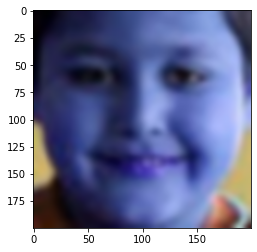

In [84]:
image=cv.imread("IMAGES/9_0_3_20170104225726769.jpg.chip.jpg")
blur = cv.GaussianBlur(image, (7,7), cv.BORDER_DEFAULT)

plt.imshow(blur)
plt.show()

Predicted age: 15 , Actual age: 9 


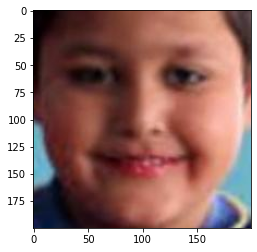

In [85]:
show_pred("9_0_3_20170104225726769.jpg.chip.jpg")

### 